In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alexattia_the_simpsons_characters_dataset_path = kagglehub.dataset_download('alexattia/the-simpsons-characters-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_1253.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_1236.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0649.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0892.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0245.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0449.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0223.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0206.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_1277.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0286.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_data

In [3]:
!pip install caer canaro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 103.7 MB/s eta 0:00:00


In [9]:
IMG_SIZE = (80,80)
channels = 1
char_path = '/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [5]:
import os
import cv2 as cv
import numpy as np
import caer
import canaro
import gc

In [10]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [11]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [12]:
# Training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.46399688720703125s
[INFO] At 1000 files
[INFO] 1454 files found in 0.1577613353729248s
[INFO] At 1000 files
[INFO] 1452 files found in 0.14726948738098145s
[INFO] At 1000 files
[INFO] 1354 files found in 0.10300922393798828s
[INFO] At 1000 files
[INFO] 1342 files found in 0.09874248504638672s
[INFO] At 1000 files
[INFO] 1291 files found in 0.08410930633544922s
[INFO] At 1000 files
[INFO] 1206 files found in 0.0607602596282959s
[INFO] At 1000 files
[INFO] 1194 files found in 0.06041431427001953s
[INFO] At 1000 files
[INFO] 1193 files found in 0.050356388092041016s
[INFO] At 1000 files
[INFO] 1079 files found in 0.00473332405090332s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 23s


In [13]:
len(train)

13811

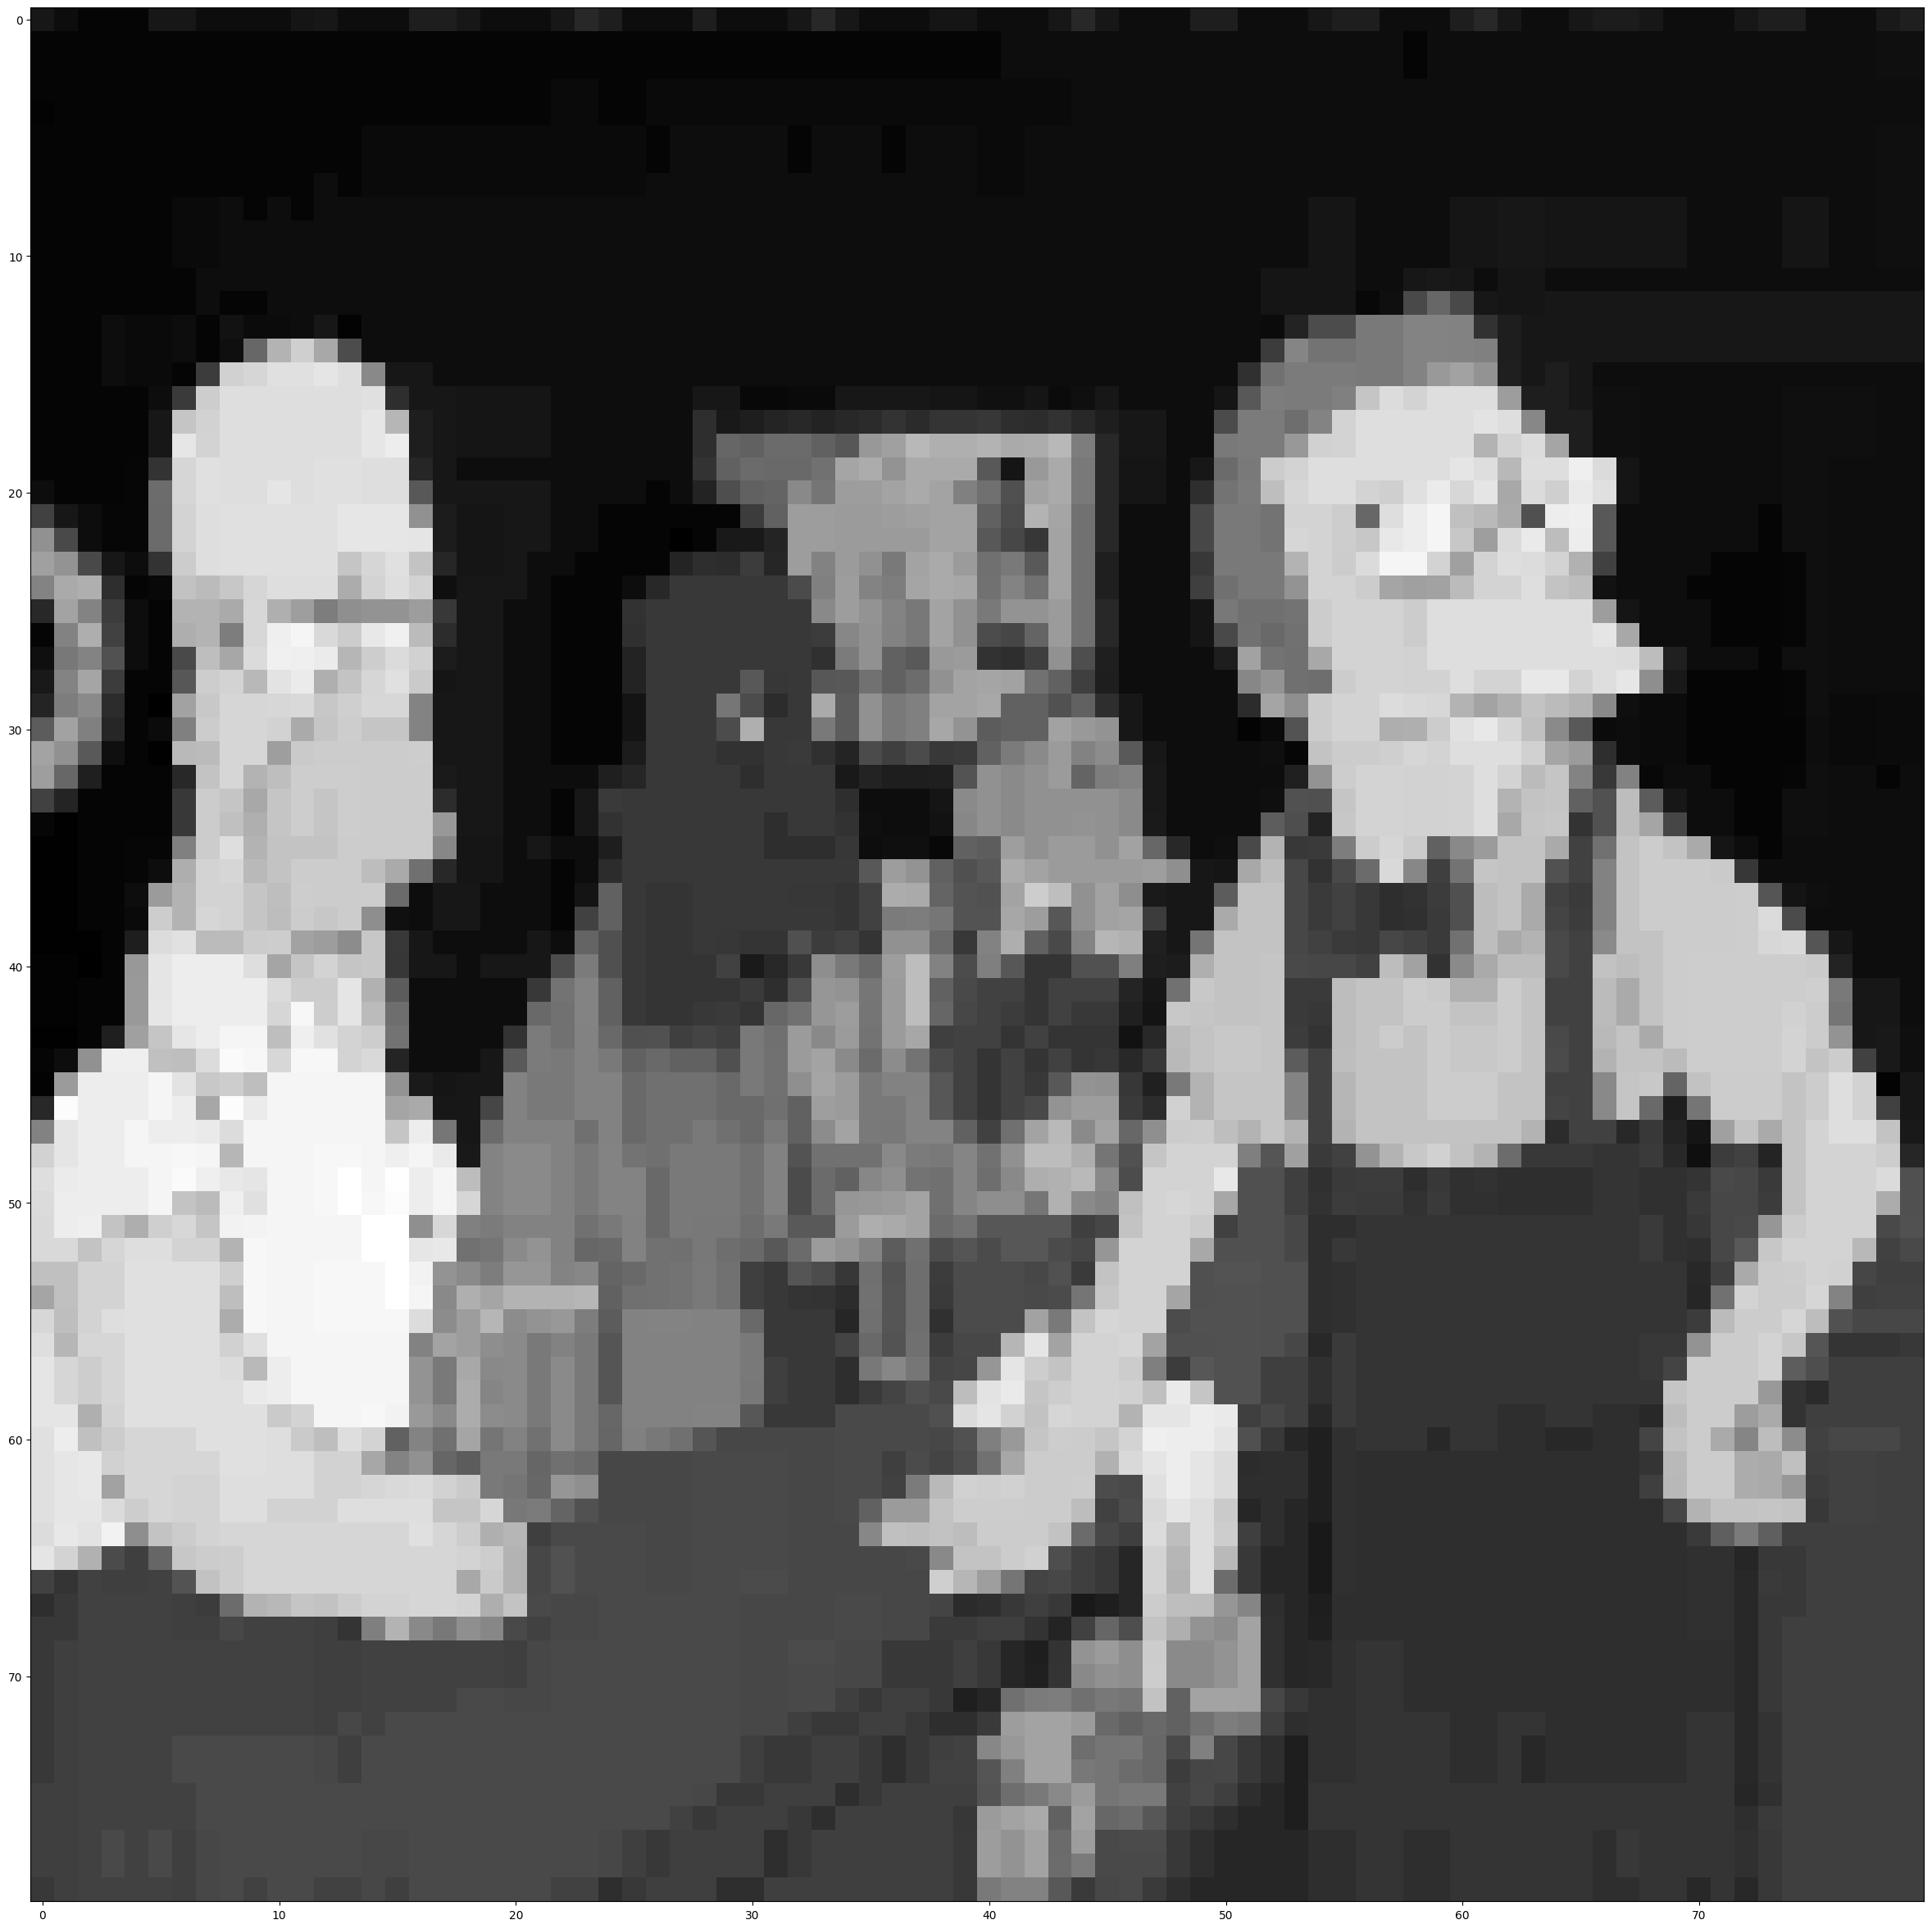

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [15]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [16]:
from tensorflow.keras.utils import to_categorical
# Normalize the featureSet
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [17]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=0.2)

In [18]:
del train
del featureSet
del labels
gc.collect()

60

In [19]:
# Image Data Generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=32)

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD

def create_custom_simpsons_model(IMG_SIZE, channels, output_dim, loss, learning_rate, momentum, nesterov):
    # Handle both tuple and int input for IMG_SIZE
    if isinstance(IMG_SIZE, int):
        input_shape = (IMG_SIZE, IMG_SIZE, channels)
    elif isinstance(IMG_SIZE, tuple) and len(IMG_SIZE) == 2:
        input_shape = (IMG_SIZE[0], IMG_SIZE[1], channels)
    else:
        raise ValueError(f"Invalid IMG_SIZE: {IMG_SIZE}")

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim, activation='softmax'))

    opt = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

    return model


model = create_custom_simpsons_model(
    IMG_SIZE=IMG_SIZE,
    channels=channels,
    output_dim=len(characters),
    loss='categorical_crossentropy',  # or binary_crossentropy for 2 classes only
    learning_rate=0.001,
    momentum=0.9,
    nesterov=True
)


In [35]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)              │ (None, 78, 78, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,674,442 (10.20 MB)

 Trainable params: 2,674,442 (10.20 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [37]:
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//32,
                    epochs=10,
                    validation_data=(x_val,y_val),
                    callbacks=callbacks_list)

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.1638 - loss: 2.2601 - val_accuracy: 0.2724 - val_loss: 2.1193 - learning_rate: 0.0100
Epoch 2/10
  1/345 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2500 - loss: 2.1330

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.2500 - loss: 2.1330 - val_accuracy: 0.2623 - val_loss: 2.1049 - learning_rate: 0.0100
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.2323 - loss: 2.1440 - val_accuracy: 0.3064 - val_loss: 2.0120 - learning_rate: 0.0100
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.2188 - loss: 2.0646 - val_accuracy: 0.3064 - val_loss: 2.0168 - learning_rate: 0.0100
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.2692 - loss: 2.0695 - val_accuracy: 0.3672 - val_loss: 1.8674 - learning_rate: 0.0100
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.3750 - loss: 1.8541 - val_accuracy: 0.3632 - val_loss: 1.8716 - learning_rate: 0.0100
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.3125 - loss: 1.9857 - val_accuracy: 0.3817 - val_loss: 1.7995 - learning_rate: 0.0100
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.2812 - loss: 2.0865

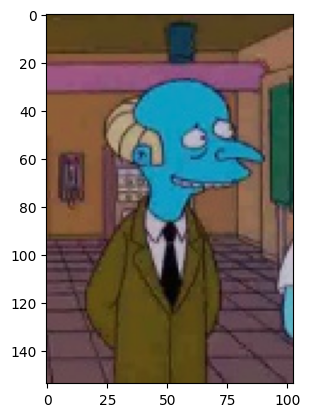

In [44]:
test_image = cv.imread('/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg')

plt.imshow(test_image)
plt.show()

def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [45]:
prediction = model.predict(prepare(test_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [46]:
print(characters[np.argmax(prediction[0])])

charles_montgomery_burns
